**Importation + Creation un Dataset Avec 2 features et un avec 3 features**

In [12]:
import numpy as np
from sklearn.datasets import make_classification

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

X1, y1 = make_classification(n_samples=300, n_features=2, n_informative=2, 
                             n_redundant=0, n_clusters_per_class=1, random_state=0)

X2, y2 = make_classification(n_samples=300, n_features=3, n_informative=3, 
                             n_redundant=0, n_clusters_per_class=1, random_state=1)

**plot function**

In [13]:
import matplotlib
import matplotlib.pyplot as plt
def labelsToColors(labels):
    # Crée un ensemble unique des étiquettes pour déterminer les classes
    uniqueLabels = np.unique(labels)
    # Génère des couleurs aléatoires pour chaque classe unique
    colors = plt.cm.rainbow(np.linspace(0, 1, len(uniqueLabels)))
    # Crée un dictionnaire pour mapper chaque étiquette à une couleur
    colorMap = {label: color for label, color in zip(uniqueLabels, colors)}
    # Mappe chaque étiquette dans l'ensemble original à une couleur
    return np.array([colorMap[label] for label in labels])
    
def plot(x, y, feature1 = 0, feature2 = 1):
    datingLabelsColors = labelsToColors(np.array(y))
    fig = plt.figure()
    plt.title("OK")
    ax = fig.add_subplot(111)
    ax.scatter(x[:,feature1], x[:, feature2], c=datingLabelsColors)
    plt.show()


**Plot Dataset 1**

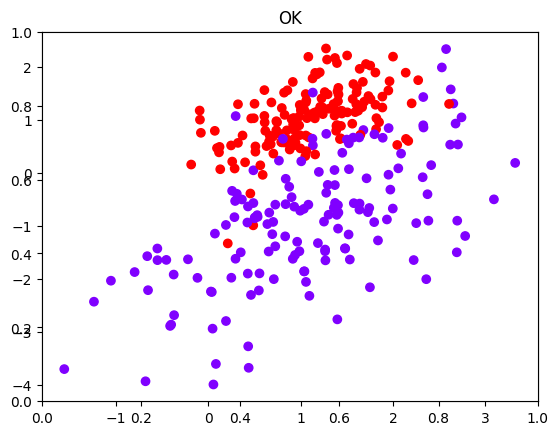

In [14]:
plot(X1, y1)

**Plot dataset 2 : Feature 1 Feature 2**

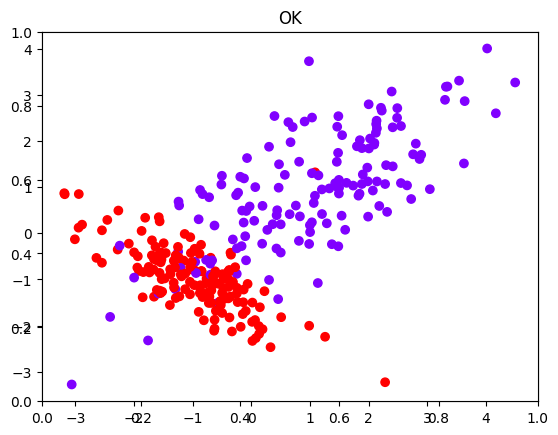

In [15]:
plot(X2, y2)

**Plot dataset 2 : Feature 2 Feature 3**


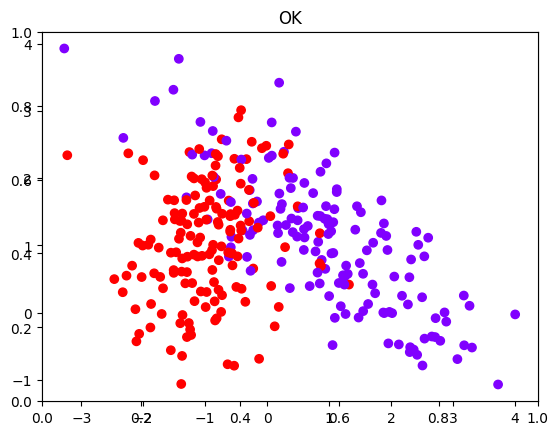

In [16]:
plot(X2, y2, 1, 2)


**Plot dataset 2 : Feature 1 Feature 3**

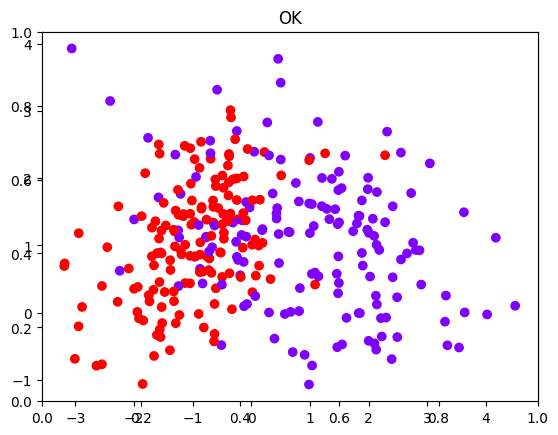

In [17]:
plot(X2, y2, 0, 2)

**Plot Best Fit**

In [18]:
def plotWithBestFit(x, y, weights=None, feature1=0, feature2=1):
    datingLabelsColors = labelsToColors(np.array(y))
    fig = plt.figure()
    plt.title("OK")
    ax = fig.add_subplot(111)
    ax.scatter(x[:, feature1], x[:, feature2], c=datingLabelsColors)

    # Plot decision boundary if weights are provided
    if weights is not None:
        # We assume weights = [bias, w1, w2]
        arrayWeight = np.array(weights)
        bias = arrayWeight[0]
        w1 = arrayWeight[1]
        w2 = arrayWeight[2]

        # Create a range of x values for the decision boundary
        x_vals = np.linspace(x[:, feature1].min(), x[:, feature1].max(), 100)
        y_vals = (-bias - w1 * x_vals) / w2  # Solve for x2 in w0 + w1*x1 + w2*x2 = 0

        ax.plot(x_vals, y_vals, color='black', label='Decision boundary')
        ax.legend()

    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.show()

**Training with SGDClassifier and StandardScaler**

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

def train(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    sgd = SGDClassifier(loss='log_loss', learning_rate='optimal', eta0=0.1,
                        max_iter=30, warm_start=True, random_state=42)
    
    batch_size = 32
    epochs = 150
    classes = np.unique(y)

    for epoch in range(epochs):
        X_shuffled, y_shuffled = shuffle(X_scaled, y, random_state=epoch)
        for i in range(0, len(X_scaled), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            sgd.partial_fit(X_batch, y_batch, classes=classes)
    return sgd



**Evaluate**

In [60]:
def evaluate(sgd, X, y):   
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_pred = sgd.predict(X_scaled)
    error_rate = 1 - accuracy_score(y, y_pred)
    print(f"Final error rate: {error_rate:.4f}")

**On Dataset 1 Train, evaluate and Plot**

In [84]:
sgd_dataset1 = train(X1, y1)

In [85]:
evaluate(sgd_dataset1, X1, y1)

Final error rate: 0.0833


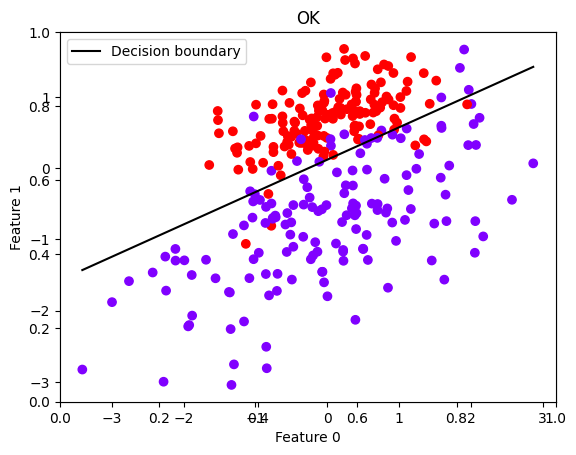

In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
plotWithBestFit(X1_scaled, y1, np.concatenate((sgd_dataset1.intercept_, sgd_dataset1.coef_[0][:])))

**Train an Evaluate on Dataset 2 with 3 features**

In [87]:
sgd_dataset2 = train(X2, y2)
evaluate(sgd_dataset2, X2, y2)

Final error rate: 0.0933


**Plot Dataset 2 Frontiere de decision Feature 1 Feature 2**

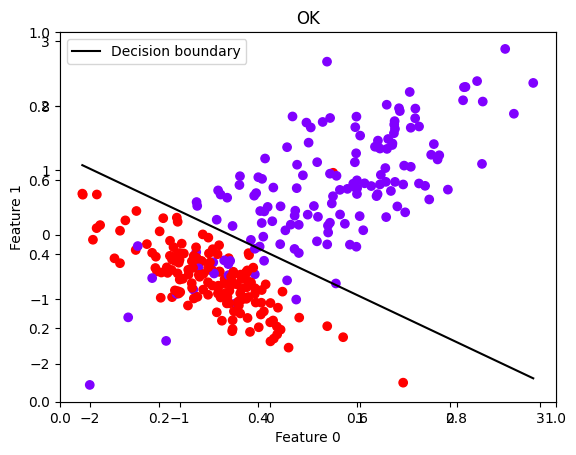

In [93]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

plotWithBestFit(X2_scaled, y2, np.concatenate((sgd_dataset2.intercept_,  [sgd_dataset2.coef_[0][0]], [sgd_dataset2.coef_[0][1]])), 0, 1)

**Plot Dataset 2 Frontiere de decision Feature 2 Feature 3**

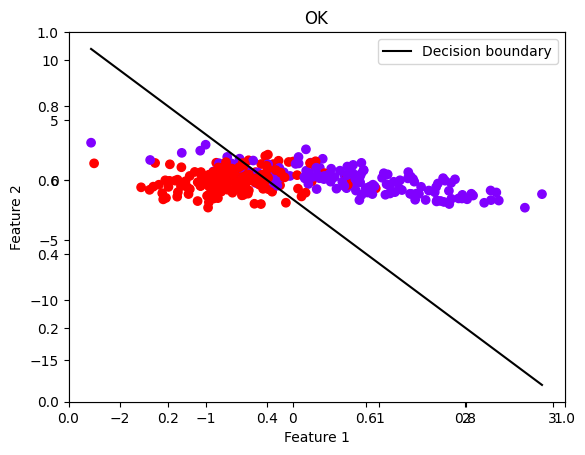

In [94]:
plotWithBestFit(X2_scaled, y2, np.concatenate((sgd_dataset2.intercept_, [sgd_dataset2.coef_[0][1]], [sgd_dataset2.coef_[0][2]])), 1, 2)

**Plot Dataset 2 Frontiere de decision Feature 1 Feature 3**

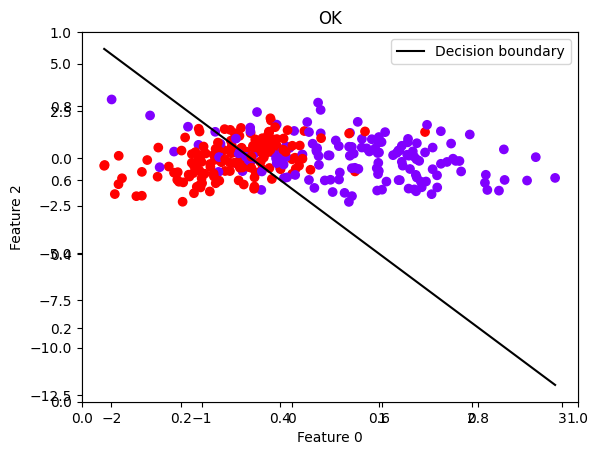

In [95]:
plotWithBestFit(X2_scaled, y2, np.concatenate((sgd_dataset2.intercept_, [sgd_dataset2.coef_[0][0]], [sgd_dataset2.coef_[0][2]])), 0, 2)